<a href="https://colab.research.google.com/github/Ashikgurung61/CODSOFT-ML/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1 CodSoft
Movie Genre Classification |
Dataset : https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb




In [ ]:
import numpy as np
import pandas as pd

#Read the file

In [ ]:
D_train = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])

<ipython-input-5-8c7a59d40acf>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  D_train = pd.read_csv("/content/train_data.txt", sep = ":::", names = ['TITLE','GENRE','DESCRIPTION'])


In [ ]:
D_train

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
6307,"""Show de Polícia"" (2012)",reality-tv,Go to an event with large crowds is always fu...
6308,6A (2016),drama,"As if immersed in the situation, the viewer w..."
6309,Anche nel west c'era una volta Dio (1968),western,A stranger being chased by bandits dies in an...
6310,"""The Generation Gap"" (1969)",game-show,A tram of three teenagers faces off against a...


In [ ]:
D_test = pd.read_csv("/content/test_data.txt", sep=":::", names = ["ID","TITLE","DESCRIPTION"])

<ipython-input-7-299b8f697a39>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  D_test = pd.read_csv("/content/test_data.txt", sep=":::", names = ["ID","TITLE","DESCRIPTION"])


In [ ]:
D_test

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
6526,6527,Posledniy den detstva (2012),Moscow suburbs. Morose and tired Seva comes h...
6527,6528,La fracture du myocarde (1990),"Suddenly, Martin's behaviour changes radicall..."
6528,6529,Fun Jump (1988),Marta Boselli si reca a Pavullo per effettuar...
6529,6530,Maanthrika Cheppu (1992),Jagadish and his friend Siddique start a vide...


In [ ]:
D_train.describe()

,TITLE,GENRE,DESCRIPTION
count,6311,6311,6311
unique,6311,27,6309
top,Living Doll (2009),drama,"Held since 2005, Film Spring Open-Air has bee..."
freq,1,1557,2


In [ ]:
D_test.describe()

,ID
count,6531.000000
mean,3266.000000
std,1885.481636
min,1.000000
25%,1633.500000
50%,3266.000000
75%,4898.500000
max,6531.000000


#Check whether there is a noice or null data in a field

In [ ]:
D_train.isna()

,TITLE,GENRE,DESCRIPTION
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
6307,False,False,False
6308,False,False,False
6309,False,False,False
6310,False,False,False


In [ ]:
D_test.isna()

,ID,TITLE,DESCRIPTION
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
6526,False,False,False
6527,False,False,False
6528,False,False,False
6529,False,False,False


In [ ]:
D_train.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
D_test.isna().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [ ]:
D_train.shape

(6311, 3)

In [ ]:
D_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6311 entries, 1 to 6311
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        6311 non-null   object
 1   GENRE        6311 non-null   object
 2   DESCRIPTION  6311 non-null   object
dtypes: object(3)
memory usage: 197.2+ KB


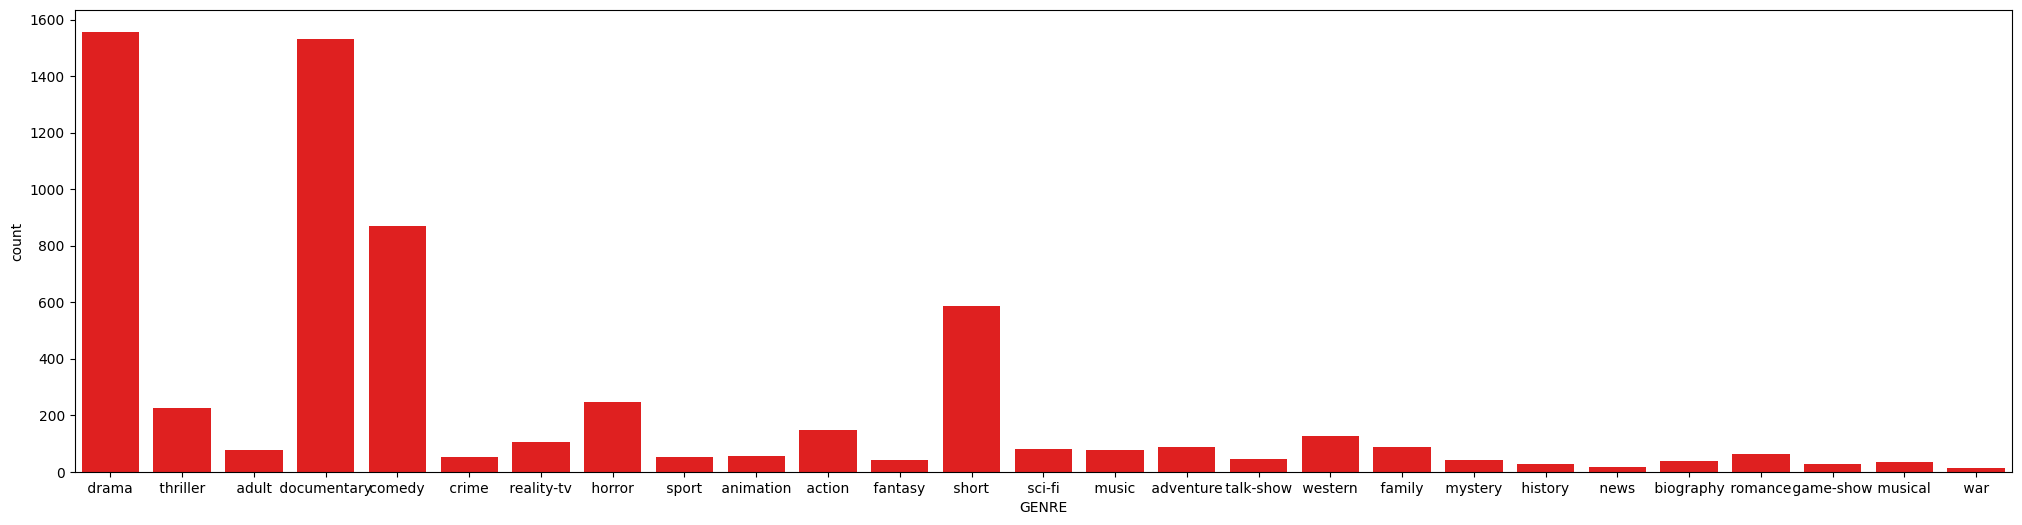

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
sns.countplot(data=D_train, x="GENRE", color = "red")
plt.show()

#Data Cleaning and Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer

#Download Stopwords

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
wnl = WordNetLemmatizer()
stemmer = LancasterStemmer()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words("english"))
import string

def preproc(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([word for word in text if word not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

D_train["Clean_Description"] = D_train["DESCRIPTION"].apply(preproc)
D_test["Clean_Description"] = D_test["DESCRIPTION"].apply(preproc)

In [ ]:
D_train

,TITLE,GENRE,DESCRIPTION,Clean_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
6307,"""Show de Polícia"" (2012)",reality-tv,Go to an event with large crowds is always fu...,event large crowds always fun right exit polic...
6308,6A (2016),drama,"As if immersed in the situation, the viewer w...",immersed situation viewer witnesses distressin...
6309,Anche nel west c'era una volta Dio (1968),western,A stranger being chased by bandits dies in an...,stranger chased bandits dies accident chance h...
6310,"""The Generation Gap"" (1969)",game-show,A tram of three teenagers faces off against a...,tram three teenagers faces team three adults c...


In [ ]:
#D_train.drop(['TextCleaning'],axis = 1,inplace = True)

In [ ]:
D_train

,TITLE,GENRE,DESCRIPTION,Clean_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
6307,"""Show de Polícia"" (2012)",reality-tv,Go to an event with large crowds is always fu...,event large crowds always fun right exit polic...
6308,6A (2016),drama,"As if immersed in the situation, the viewer w...",immersed situation viewer witnesses distressin...
6309,Anche nel west c'era una volta Dio (1968),western,A stranger being chased by bandits dies in an...,stranger chased bandits dies accident chance h...
6310,"""The Generation Gap"" (1969)",game-show,A tram of three teenagers faces off against a...,tram three teenagers faces team three adults c...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()
x_train = tf.fit_transform(D_train['Clean_Description'])
y_test = tf.fit_transform(D_test['Clean_Description'])

In [ ]:
x = x_train
y = D_train['GENRE']

In [ ]:
x

<6311x37665 sparse matrix of type '<class 'numpy.float64'>'
	with 307729 stored elements in Compressed Sparse Row format>

In [ ]:
y

1             drama 
2          thriller 
3             adult 
4             drama 
5             drama 
            ...     
6307     reality-tv 
6308          drama 
6309        western 
6310      game-show 
6311          short 
Name: GENRE, Length: 6311, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 30)

#Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Train_scores = lr.score(X_train, y_train)
print("Accuracy ", Train_scores * 100)

Accuracy  67.01664025356577


In [ ]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([' comedy ', ' drama ', ' drama ', ..., ' documentary ', ' drama ',
       ' comedy '], dtype=object)

In [ ]:
ac = accuracy_score(y_test, y_test_pred)
print("Accuracy: ", ac * 100)

Accuracy:  50.752177355502766


#Support Vector Machine

In [ ]:
from sklearn.svm import SVC
Support = SVC()

In [ ]:
Support.fit(X_train, y_train)

SVC()

In [ ]:
Support.score(X_train, y_train)

0.868660855784469

In [ ]:
y_test_preds = Support.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_test_preds)
print("Accuracy: ", accuracy * 100)

Accuracy:  47.347585114806016
